<a href="https://colab.research.google.com/github/sitiameliarahmi/Analitikadata/blob/main/UAS_Andat_3333210063_Siti_Amelia_Rahmi_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**


A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**UBER**

Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery (Uber Eats and Postmates), package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental. The company is based in San Francisco and has operations in over 900 metropolitan areas worldwide. It is one of the largest firms in the gig economy. Uber is estimated to have over 93 million monthly active users worldwide. In the United States, Uber has a 71% market share for ride-sharing and a 22% market share for food delivery. Uber has been so prominent in the sharing economy that changes in various industries as a result of Uber have been referred to as uberisation, and many startups have described their offerings as "Uber for X".

**Import Library**

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Fungsi Library**
1. pandas untuk analisis dan manipulasi data
2. numpy untuk melakukan operasi numerik data
3. matplotlib.pyplot untuk membuat visualisasi grafik dan plot data
4. seaborn untuk visualisasi data statistik
5. math untuk melakukan operasi matematika
6. datetime untuk mengelola objek waktu dan tanggal

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/varpit94/uber-stock-data

In [160]:
# https://drive.google.com/file/d/1GC9j-neeg6dfXtrft3vW59WtgJvkGjdF/view?usp=sharing

!gdown 1GC9j-neeg6dfXtrft3vW59WtgJvkGjdF

Downloading...
From: https://drive.google.com/uc?id=1GC9j-neeg6dfXtrft3vW59WtgJvkGjdF
To: /content/UBER[1].csv
100% 50.7k/50.7k [00:00<00:00, 115MB/s]


Mengimport dataset UBER Stock Data

In [161]:
train_data = pd.read_csv('UBER[1].csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


Berisikan rincian data pada datasets yang dipakai

Data date time digunakan sebagai forecasting

Data open, high, low, close, dan adj close merupakan fitur terkait harga saham

Check missing values

In [162]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       725 non-null    object 
 1   Open       725 non-null    float64
 2   High       725 non-null    float64
 3   Low        725 non-null    float64
 4   Close      725 non-null    float64
 5   Adj Close  725 non-null    float64
 6   Volume     725 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 39.8+ KB


Mengecek apakah ada missing value berdasarkan panjang data

Check statistic vales for every features

In [163]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,40.166447,40.961435,39.261123,40.107255,40.107255,2.472855e+07
std,9.198940,9.259164,9.075919,9.141862,9.141862,1.691406e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.730000,33.419998,31.983000,32.799999,32.799999,1.423060e+07
50%,39.000000,39.959999,38.009998,38.810001,38.810001,2.079540e+07
75%,46.700001,47.520000,45.860001,46.419998,46.419998,3.011960e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


Mengecek statistical values berupa mean, median, nilai maximum, dll

Handle datetime data for time series

In [164]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


Membaca fitur date ke dalam date time agar menjadi satu format tipe data, setelah itu ubah index date time menjadi hari dan tanggal

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

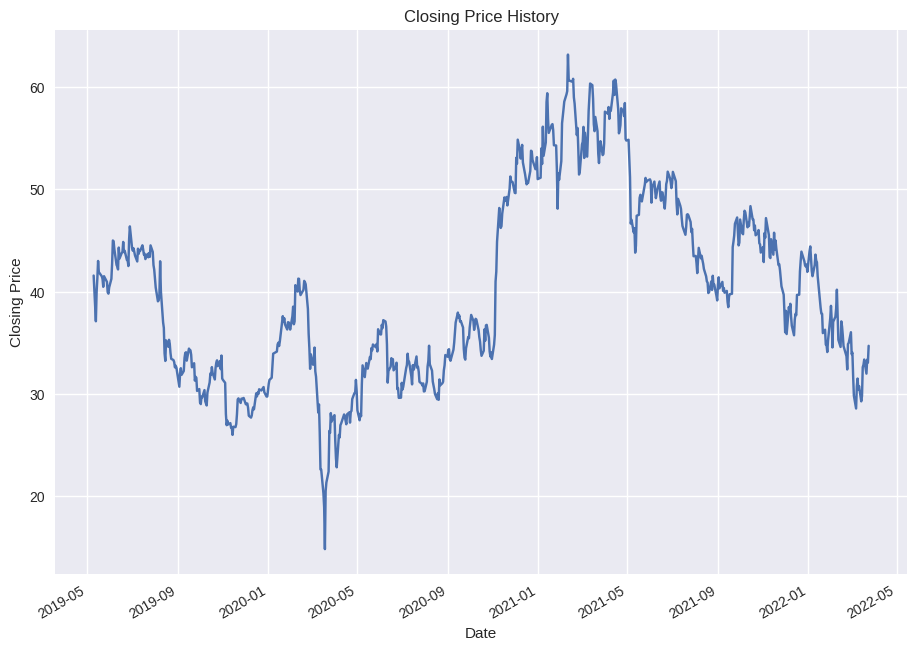

In [165]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Mengecek data ketika pasar saham ditutup pada bulan januari, mei, dan september per tahun. Pada grafik terlihat bahwa tren pasar saham UBER mengalami penurunan dan kenaikan

<Figure size 1600x800 with 0 Axes>

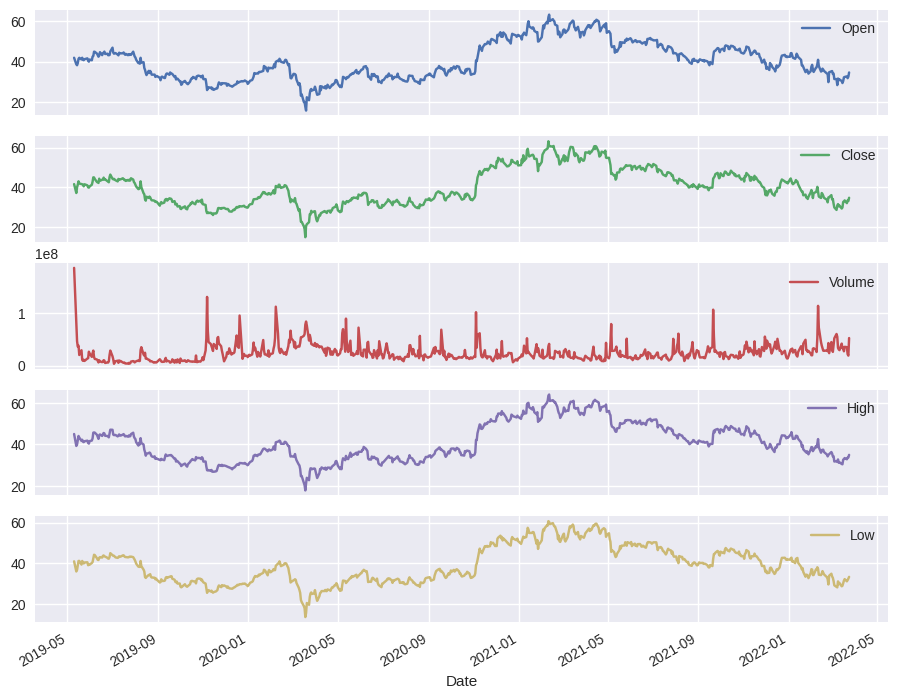

In [166]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Mengecek tren pasar untuk fitur lainnya seperti open, close, volume, high, dan low

In [167]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Membuat dua fitur baru yaitu fitur membaca data harga tertinggi dan terendah serta fitur harga penutupan dan harga pembukaan

In [168]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Masukkkan kedua fitur baru tadi kedalam datasets

In [169]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

37


<ipython-input-169-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Membuat harga penutupan saham sebagai label untuk memprediksi harga saham pada hari itu

In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Memakai beberapa library sklearn untuk membuat model algoritma data

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [171]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-171-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Memakai scaler untuk menormalisasikan data agar range data tidak terlalu jauh dan untuk mengurangi bias

In [172]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [173]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-173-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Slicing data untuk menentukan data inputan x dan y

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting dataset untuk train dan test data

In [175]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [176]:
lr_confidence

0.3548755841713429

In [177]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [178]:
rf_confidence

0.49189667299936457

Menggunakan model linear regression dan random forest untuk uji cobanya

In [179]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-179-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-179-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-179-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(

Menggambarkan langkah melakukan prediksi data masa depan dengan model Regressor Random Forest dan menyimpan hasil prediksi dalam dataframe serta menghasilkan waktu dalam detik

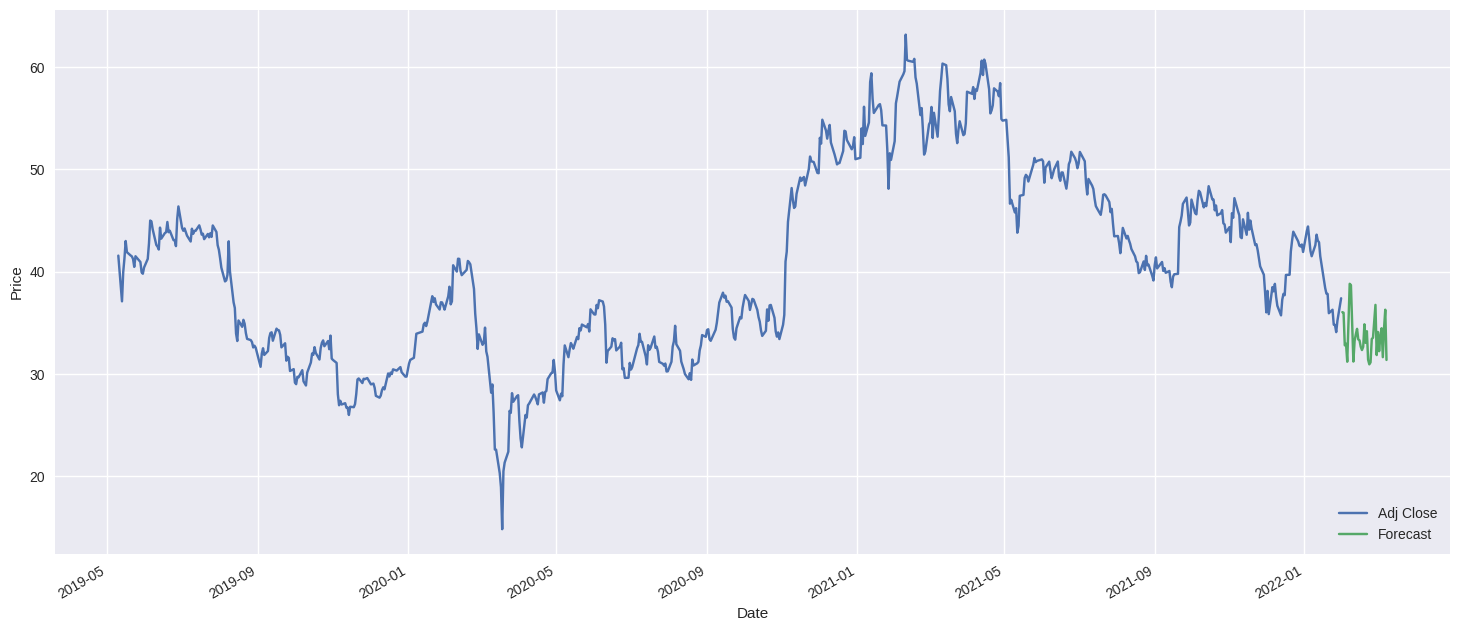

In [180]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Prediksi selanjutnya digambarkan dalam grafik warna hijau